# CSCI 3360: Course Project
**Project Members:** JP Park, Yiren Hou, Martha Sikora, Pragya Bhayana
**Dataset:** [Predicting Depression, Anxiety, and Stress](https://www.kaggle.com/yamqwe/depression-anxiety-stress-scales) from [Kaggle](https://www.kaggle.com) by [Yam Peleg](https://www.kaggle.com/yamqwe)

In [305]:
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from matplotlib.gridspec import GridSpec

In [287]:
df = pd.read_csv("data/cleaned.csv")

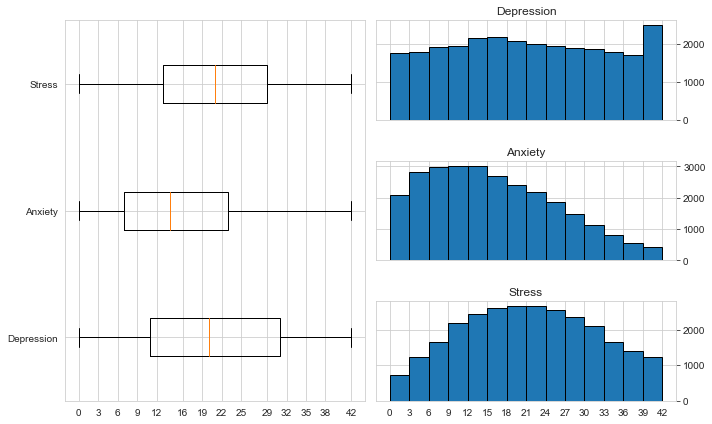

In [288]:
sn.set_style("whitegrid")

gs: GridSpec = GridSpec(nrows=3, ncols=2)
fig: Figure = plt.figure(figsize=(10, 6))

score_ticks = np.linspace(0, 42, 14, dtype=int)
score_cols = ['depression_score', 'anxiety_score', 'stress_score']
labels = ['depression', 'anxiety', 'stress']

ax0: Axes = fig.add_subplot(gs[:, 0])
ax0.boxplot(df[score_cols],
            vert=False,
            labels=list(map(lambda s: s.title(), labels)))
ax0.set_xticks(score_ticks)

for i, label in enumerate(labels):
    ax: Axes = fig.add_subplot(gs[i, 1])

    _, bins, _ = ax.hist(df[f'{label}_score'], bins=14, edgecolor='black')

    ax.set_title(label.title())
    ax.set_xticks(bins)

    if i < 2:
        ax.tick_params(axis='x', labelcolor='none')

    ax.tick_params(axis='y', which='both',
                   labelleft=False, labelright=True, right=True)

fig.tight_layout()

<AxesSubplot:xlabel='age', ylabel='score'>

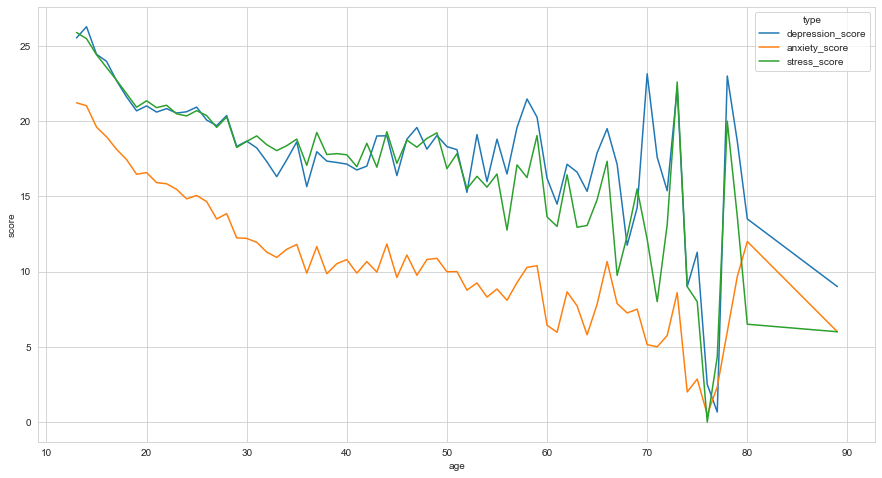

In [289]:
fig, ax = plt.subplots(figsize=(15, 8))

sn.lineplot(ax=ax, x='age', y='score', hue='type', ci=None,
            data=df.melt('age', score_cols, 'type', 'score'))

In [290]:
def plt_boxen(y: str, order: List[str]):
    fig: Figure
    fig, axes = plt.subplots(1, 3, figsize=(15, len(order)))

    for i, col in enumerate(score_cols):
        ax: Axes = axes[i]

        sn.boxenplot(ax=ax, x=col, y=y, data=df,
                     order=order, orient='h', linewidth=2,
                     palette='pastel')

        if i != 0:
            ax.tick_params(axis='y', labelcolor='none')
            ax.yaxis.set_visible(False)

        ax.set_xticks(score_ticks)

    fig.tight_layout()
    fig.savefig(f'img/{y}.png')

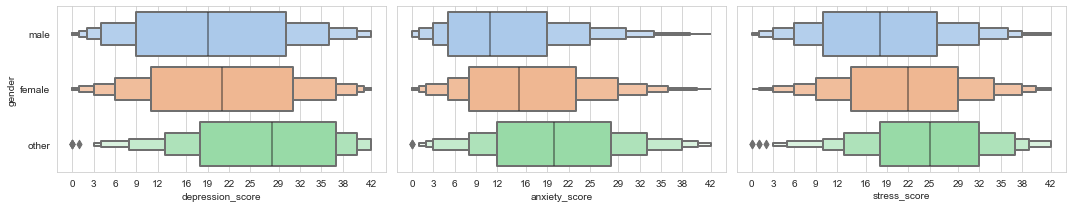

In [291]:
order = ['male', 'female', 'other']
plt_boxen('gender', order)

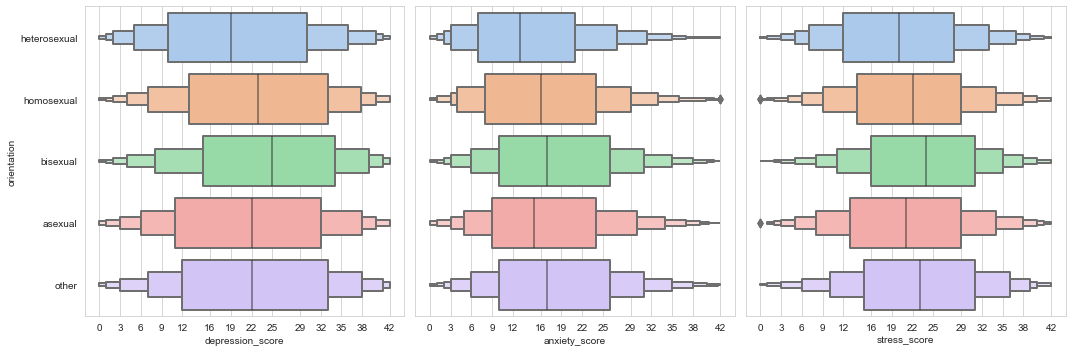

In [292]:
order = ['heterosexual', 'homosexual', 'bisexual', 'asexual', 'other']
plt_boxen('orientation', order)

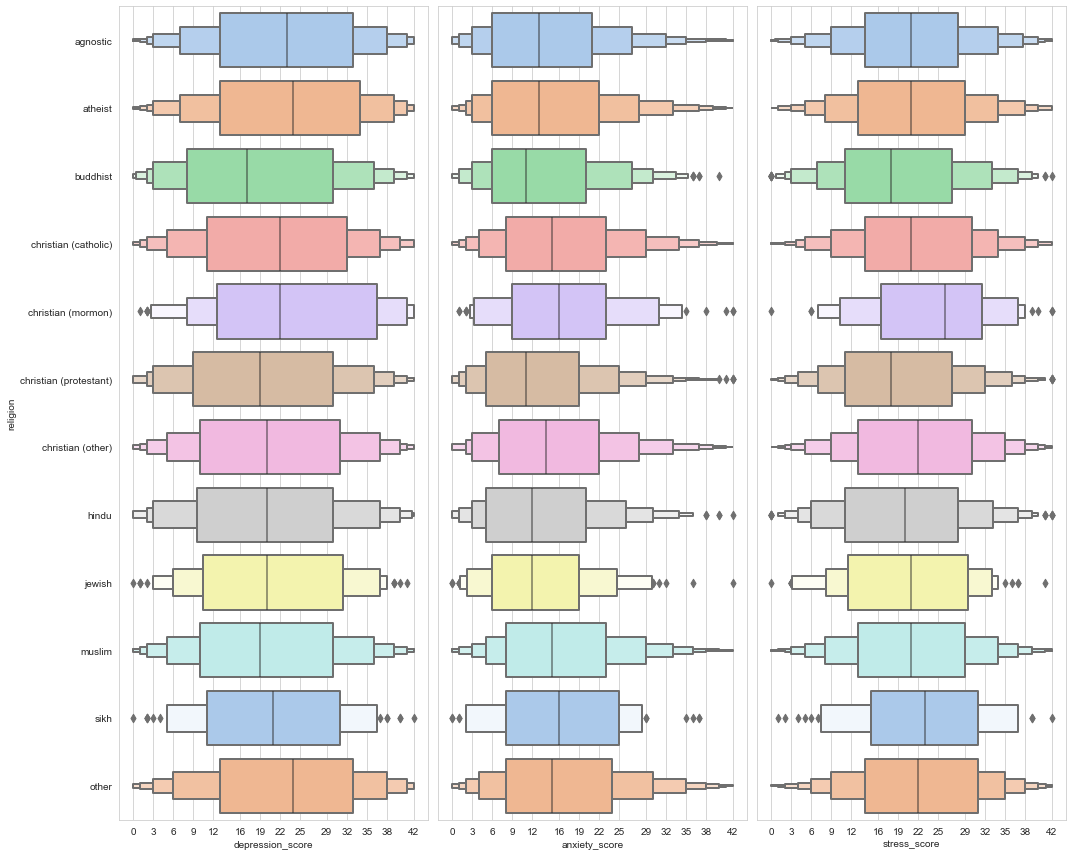

In [293]:
order = ['agnostic', 'atheist', 'buddhist', 'christian (catholic)',
         'christian (mormon)', 'christian (protestant)', 'christian (other)',
         'hindu', 'jewish', 'muslim', 'sikh', 'other']
plt_boxen('religion', order)

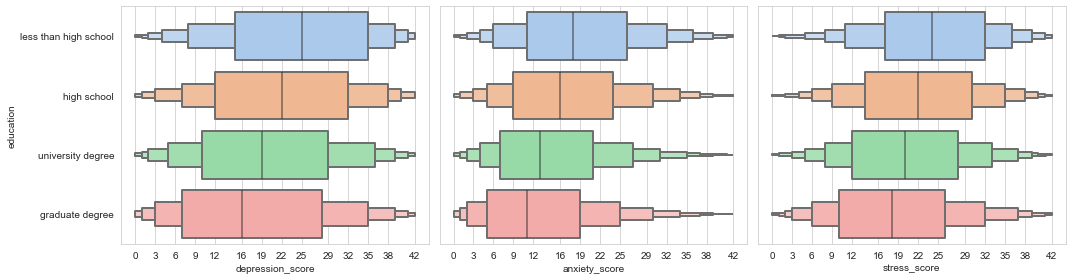

In [294]:
order = ['less than high school', 'high school',
         'university degree', 'graduate degree']
plt_boxen('education', order)

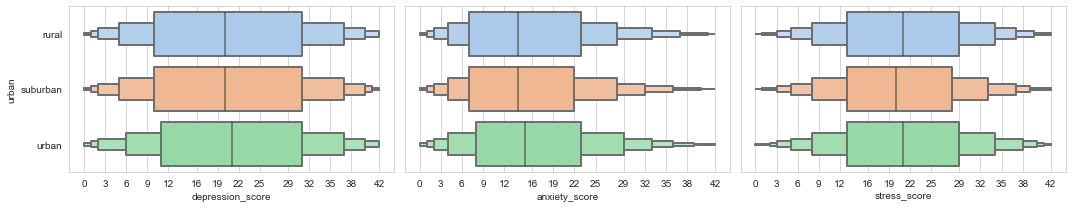

In [295]:
order = ['rural', 'suburban', 'urban']
plt_boxen('urban', order)

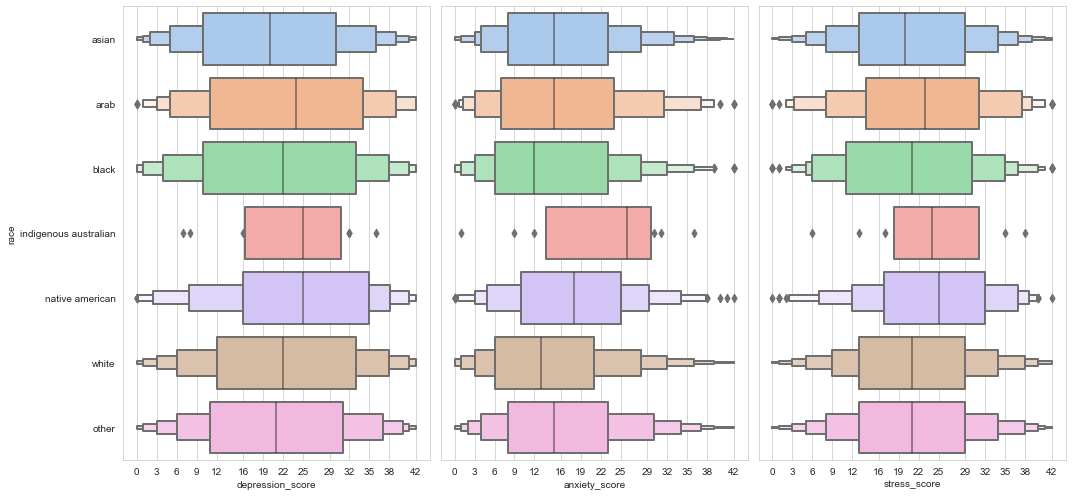

In [296]:
order = ['asian', 'arab', 'black', 'indigenous australian',
         'native american', 'white', 'other']
plt_boxen('race', order)

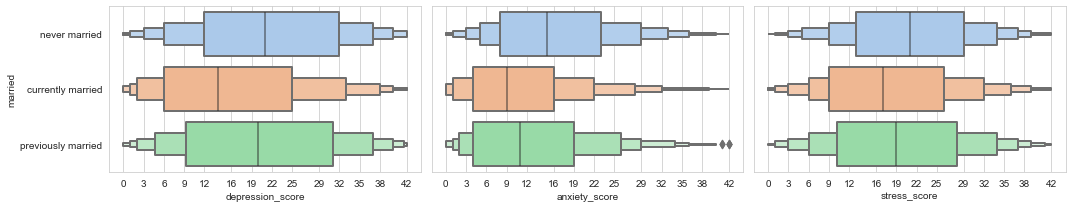

In [297]:
order = ['never married', 'currently married', 'previously married']
plt_boxen('married', order)

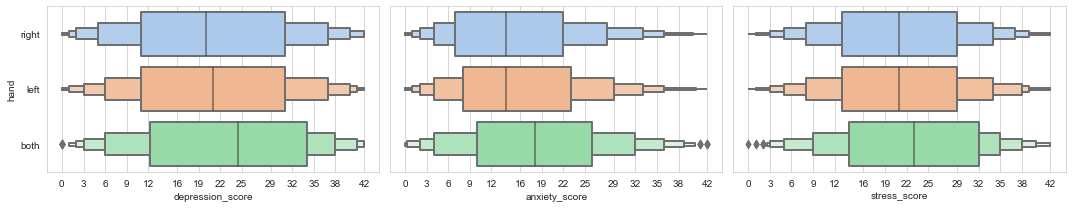

In [298]:
order = ['right', 'left', 'both']
plt_boxen('hand', order)

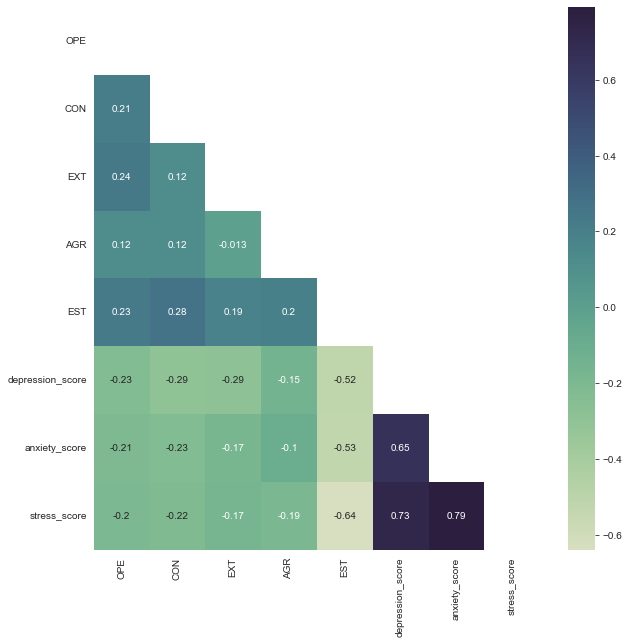

In [299]:
fig, ax = plt.subplots(figsize=(10, 10))

corr = df[['OPE', 'CON', 'EXT', 'AGR', 'EST', *score_cols]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sn.heatmap(ax=ax, data=corr, mask=mask, annot=True,
           cmap=sn.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))

fig.savefig('img/corr.png')

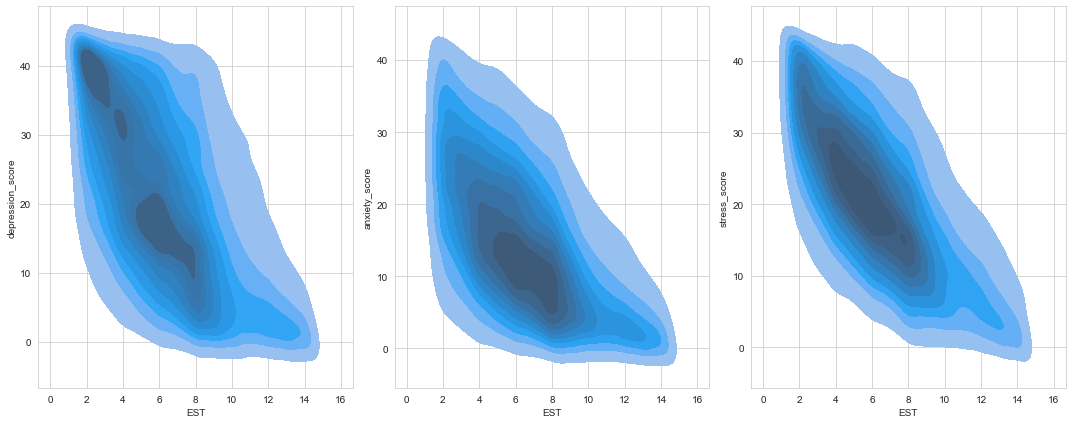

In [311]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
sn.kdeplot(ax=axes[0], x='EST', y='depression_score', data=df, fill=True)
sn.kdeplot(ax=axes[1], x='EST', y='anxiety_score', data=df, fill=True)
sn.kdeplot(ax=axes[2], x='EST', y='stress_score', data=df, fill=True)
fig.tight_layout()